In [181]:
#Part 1 - Personal Finance Planner

In [182]:
# Initial imports
import os
import json
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [183]:
# Load .env enviroment variables
load_dotenv()

True

In [184]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [185]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [186]:
# Fetch current BTC price
btc_data = requests.get(btc_url).json()
btc_data_CAD = btc_data["data"]["1"]["quotes"]["CAD"]["price"]
print(f"The current Bitcoin Price in CAD is: ${btc_data_CAD}")

The current Bitcoin Price in CAD is: $57584.488


In [187]:
# Fetch current ETH price
eth_data = requests.get(eth_url).json()
eth_data_CAD = eth_data["data"]["1027"]["quotes"]["CAD"]["price"]
print(f"The current Ethereum Price in CAD is: ${eth_data_CAD}")

The current Ethereum Price in CAD is: $4325.88536


In [188]:
# Compute current value of my crpto
my_btc_value = btc_data_CAD * my_btc
my_eth_value = eth_data_CAD * my_eth

In [189]:
# Print current crypto wallet balance
print(f"The current value of my {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of my {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of my 1.2 BTC is $69101.39
The current value of my 5.3 ETH is $22927.19


In [190]:
#Collect Investments Data Using Alpaca: SPY (stocks) and AGG (bonds)

In [191]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [192]:
# Set Alpaca API key and secret

In [193]:
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_API_KEY")

In [194]:
# Create the Alpaca API object

In [195]:
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

In [196]:
timeframe = "1Day"
start_date = pd.Timestamp("2022-04-01", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2022-04-01", tz="America/New_York").isoformat()
tickers= ['AGG','SPY']

In [197]:
df = alpaca.get_bars(
    tickers,
    timeframe,
    start=start_date,
    end=end_date
).df

df.head()

,open,high,low,close,volume,trade_count,vwap,symbol
timestamp,,,,,,,,
2022-04-01 04:00:00+00:00,106.35,106.95,106.25,106.75,11579091,40126,106.667931,AGG
2022-04-01 04:00:00+00:00,453.30,453.46,449.14,452.92,88676014,624745,451.850848,SPY


In [198]:
# Reorganize the DataFrame
# Separate ticker data

In [199]:
AGG = df[df['symbol']=='AGG'].drop('symbol', axis=1)
SPY = df[df['symbol']=='SPY'].drop('symbol', axis=1)

In [200]:
# Concatenate the ticker DataFrames
df = pd.concat([AGG, SPY], axis=1, keys=["AGG", "SPY"])
df.head()

AGG                                    \
                             open    high     low   close    volume   
timestamp                                                             
2022-04-01 04:00:00+00:00  106.35  106.95  106.25  106.75  11579091   

                                                     SPY                  \
                          trade_count        vwap   open    high     low   
timestamp                                                                  
2022-04-01 04:00:00+00:00       40126  106.667931  453.3  453.46  449.14   

                                                                     
                            close    volume trade_count        vwap  
timestamp                                                            
2022-04-01 04:00:00+00:00  452.92  88676014      624745  451.850848

In [201]:
# Pick AGG and SPY close prices

In [202]:
agg_close_price = float(df['AGG']['close'])

In [203]:
agg_close_price

106.75

In [204]:
spy_close_price = float(df['SPY']['close'])
spy_close_price

452.92

In [205]:
# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $106.75
Current SPY closing price: $452.92


In [206]:
# Compute the current value of shares
my_spy_value = spy_close_price * my_spy
my_agg_value = agg_close_price * my_agg

In [207]:
# Print current value of shares
print(f"The current value of my {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of my {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of my 50 SPY shares is $22646.00
The current value of my 200 AGG shares is $21350.00


In [208]:
#Savings Health Analysis

In [209]:
# Set monthly household income
monthly_income = 12000

In [210]:
# Consolidate financial assets data
crypto = my_btc_value + my_eth_value
shares = my_spy_value + my_agg_value

In [211]:
crypto

92028.578008

In [212]:
shares

43996.0

In [213]:
df_savings = { 'Assets' : ['Crypto', 'Shares'],
               'Total (CAD $)' : [92375.71, 43996.00]
             }

In [214]:
df_savings

{'Assets': ['Crypto', 'Shares'], 'Total (CAD $)': [92375.71, 43996.0]}

In [215]:
final_analysis = pd.DataFrame(df_savings)

In [216]:
final_analysis = final_analysis.set_index(['Assets'])

In [217]:
final_analysis

,Total (CAD $)
Assets,
Crypto,92375.71
Shares,43996.00


In [218]:
# Plot savings pie chart

<AxesSubplot:title={'center':'My Savings'}, ylabel='Total (CAD $)'>

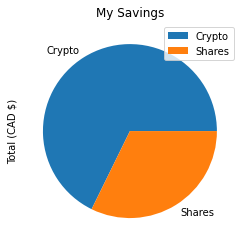

In [219]:
final_analysis.plot.pie(y="Total (CAD $)", title="My Savings")

In [220]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

In [221]:
# Calculate total amount of savings
total_savings = crypto + shares
total_savings

136024.57800799998

In [222]:
if total_savings > emergency_fund:
    print(f"Congratulations! You have more than enough money in your emergency fund.")
elif total_savings == emergency_fund:
    print(f"Congratulations! You are up par with your emergency fund.")
else:
    print(f"Failure!!! You need {'emergency_fund' - 'total_savings'} in your savings account")

Congratulations! You have more than enough money in your emergency fund.


In [223]:
#Part 2 - Retirement Planning
#Monte Carlo Simulation

In [224]:
# Set start and end dates of five years back from today.
start_date2 = pd.Timestamp('2017-04-02', tz='America/New_York').isoformat()
end_date2 = pd.Timestamp('2022-04-02', tz='America/New_York').isoformat()

In [225]:
# Get 5 years' worth of historical data for SPY and AGG
df_5years = alpaca.get_bars(
    tickers,
    timeframe,
    start=start_date2,
    end=end_date2
).df

df_5years

,open,high,low,close,volume,trade_count,vwap,symbol
timestamp,,,,,,,,
2017-04-03 04:00:00+00:00,108.31,108.680,108.300,108.67,5198006,15992,108.605513,AGG
2017-04-04 04:00:00+00:00,108.61,108.650,108.520,108.57,1627492,8325,108.591265,AGG
2017-04-05 04:00:00+00:00,108.48,108.740,108.453,108.69,2304074,11167,108.599103,AGG
2017-04-06 04:00:00+00:00,108.64,108.710,108.480,108.68,1725301,7746,108.588276,AGG
2017-04-07 04:00:00+00:00,108.80,108.890,108.420,108.44,1783599,8534,108.645684,AGG
...,...,...,...,...,...,...,...,...
2022-03-28 04:00:00+00:00,452.05,455.910,450.060,455.84,68744767,624225,453.296491,SPY
2022-03-29 04:00:00+00:00,460.07,462.070,457.180,461.53,86682895,738526,459.632992,SPY
2022-03-30 04:00:00+00:00,460.29,461.195,456.465,458.79,79668682,659199,459.158702,SPY


In [226]:
# Reorganize the DataFrame
# Separate ticker data

In [227]:
AGG_5years = df_5years[df_5years['symbol']=='AGG'].drop('symbol', axis=1)
SPY_5years = df_5years[df_5years['symbol']=='SPY'].drop('symbol', axis=1)

In [228]:
# Concatenate the ticker DataFrames
df_5years = pd.concat([AGG_5years, SPY_5years], axis=1, keys=["AGG", "SPY"])
df_5years

AGG                                       \
                             open      high      low   close    volume   
timestamp                                                                
2017-04-03 04:00:00+00:00  108.31  108.6800  108.300  108.67   5198006   
2017-04-04 04:00:00+00:00  108.61  108.6500  108.520  108.57   1627492   
2017-04-05 04:00:00+00:00  108.48  108.7400  108.453  108.69   2304074   
2017-04-06 04:00:00+00:00  108.64  108.7100  108.480  108.68   1725301   
2017-04-07 04:00:00+00:00  108.80  108.8900  108.420  108.44   1783599   
...                           ...       ...      ...     ...       ...   
2022-03-28 04:00:00+00:00  106.25  106.5252  106.160  106.36   8540551   
2022-03-29 04:00:00+00:00  106.61  106.8900  106.455  106.86  11396549   
2022-03-30 04:00:00+00:00  106.60  107.1500  106.590  107.15  11544378   
2022-03-31 04:00:00+00:00  107.19  107.3800  107.060  107.10  13788220   
2022-04-01 04:00:00+00:00  106.35  106.9500  106.250  106.75  11579091   

                                                      SPY                    \
                          trade_count        vwap    open     high      low   
timestamp                                                                     
2017-04-03 04:00:00+00:00       15992  108.605513  235.79  236.030  233.910   
2017-04-04 04:00:00+00:00        8325  108.591265  235.00  235.580  234.555   
2017-04-05 04:00:00+00:00       11167  108.599103  236.26  237.390  234.540   
2017-04-06 04:00:00+00:00        7746  108.588276  234.96  236.040  234.425   
2017-04-07 04:00:00+00:00        8534  108.645684  235.18  236.000  234.640   
...                               ...         ...     ...      ...      ...   
2022-03-28 04:00:00+00:00       27246  106.295912  452.05  455.910  450.060   
2022-03-29 04:00:00+00:00       33651  106.734051  460.07  462.070  457.180   
2022-03-30 04:00:00+00:00       24975  107.007713  460.29  461.195  456.465   
2022-03-31 04:00:00+00:00       44817  107.229272  457.92  458.760  451.160   
2022-04-01 04:00:00+00:00       40126  106.667931  453.30  453.460  449.140   

                                                                      
                            close     volume trade_count        vwap  
timestamp                                                             
2017-04-03 04:00:00+00:00  235.33   85546486      278486  235.194832  
2017-04-04 04:00:00+00:00  235.48   56466195      192579  235.237449  
2017-04-05 04:00:00+00:00  234.78  108800604      363080  235.933657  
2017-04-06 04:00:00+00:00  235.44   69135757      244996  235.287745  
2017-04-07 04:00:00+00:00  235.20   74412311      235941  235.290964  
...                           ...        ...         ...         ...  
2022-03-28 04:00:00+00:00  455.84   68744767      624225  453.296491  
2022-03-29 04:00:00+00:00  461.53   86682895      738526  459.632992  
2022-03-30 04:00:00+00:00  458.79   79668682      659199  459.158702  
2022-03-31 04:00:00+00:00  452.11  118607132      751169  455.444107  
2022-04-01 04:00:00+00:00  452.92   88676014      624745  451.850848  

[1260 rows x 14 columns]

In [229]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns

In [230]:
MC_shares = MCSimulation(
    portfolio_data = df_5years,
    weights = [.40, .60],
    num_simulation = 500,
    num_trading_days = 252*30
)

In [231]:
# Printing the simulation input data
MC_shares.portfolio_data

AGG                                       \
                             open      high      low   close    volume   
timestamp                                                                
2017-04-03 04:00:00+00:00  108.31  108.6800  108.300  108.67   5198006   
2017-04-04 04:00:00+00:00  108.61  108.6500  108.520  108.57   1627492   
2017-04-05 04:00:00+00:00  108.48  108.7400  108.453  108.69   2304074   
2017-04-06 04:00:00+00:00  108.64  108.7100  108.480  108.68   1725301   
2017-04-07 04:00:00+00:00  108.80  108.8900  108.420  108.44   1783599   
...                           ...       ...      ...     ...       ...   
2022-03-28 04:00:00+00:00  106.25  106.5252  106.160  106.36   8540551   
2022-03-29 04:00:00+00:00  106.61  106.8900  106.455  106.86  11396549   
2022-03-30 04:00:00+00:00  106.60  107.1500  106.590  107.15  11544378   
2022-03-31 04:00:00+00:00  107.19  107.3800  107.060  107.10  13788220   
2022-04-01 04:00:00+00:00  106.35  106.9500  106.250  106.75  11579091   

                                                                   SPY  \
                          trade_count        vwap daily_return    open   
timestamp                                                                
2017-04-03 04:00:00+00:00       15992  108.605513          NaN  235.79   
2017-04-04 04:00:00+00:00        8325  108.591265    -0.000920  235.00   
2017-04-05 04:00:00+00:00       11167  108.599103     0.001105  236.26   
2017-04-06 04:00:00+00:00        7746  108.588276    -0.000092  234.96   
2017-04-07 04:00:00+00:00        8534  108.645684    -0.002208  235.18   
...                               ...         ...          ...     ...   
2022-03-28 04:00:00+00:00       27246  106.295912     0.002451  452.05   
2022-03-29 04:00:00+00:00       33651  106.734051     0.004701  460.07   
2022-03-30 04:00:00+00:00       24975  107.007713     0.002714  460.29   
2022-03-31 04:00:00+00:00       44817  107.229272    -0.000467  457.92   
2022-04-01 04:00:00+00:00       40126  106.667931    -0.003268  453.30   

                                                                            \
                              high      low   close     volume trade_count   
timestamp                                                                    
2017-04-03 04:00:00+00:00  236.030  233.910  235.33   85546486      278486   
2017-04-04 04:00:00+00:00  235.580  234.555  235.48   56466195      192579   
2017-04-05 04:00:00+00:00  237.390  234.540  234.78  108800604      363080   
2017-04-06 04:00:00+00:00  236.040  234.425  235.44   69135757      244996   
2017-04-07 04:00:00+00:00  236.000  234.640  235.20   74412311      235941   
...                            ...      ...     ...        ...         ...   
2022-03-28 04:00:00+00:00  455.910  450.060  455.84   68744767      624225   
2022-03-29 04:00:00+00:00  462.070  457.180  461.53   86682895      738526   
2022-03-30 04:00:00+00:00  461.195  456.465  458.79   79668682      659199   
2022-03-31 04:00:00+00:00  458.760  451.160  452.11  118607132      751169   
2022-04-01 04:00:00+00:00  453.460  449.140  452.92   88676014      624745   

                                                    
                                 vwap daily_return  
timestamp                                           
2017-04-03 04:00:00+00:00  235.194832          NaN  
2017-04-04 04:00:00+00:00  235.237449     0.000637  
2017-04-05 04:00:00+00:00  235.933657    -0.002973  
2017-04-06 04:00:00+00:00  235.287745     0.002811  
2017-04-07 04:00:00+00:00  235.290964    -0.001019  
...                               ...          ...  
2022-03-28 04:00:00+00:00  453.296491     0.006958  
2022-03-29 04:00:00+00:00  459.632992     0.012482  
2022-03-30 04:00:00+00:00  459.158702    -0.005937  
2022-03-31 04:00:00+00:00  455.444107    -0.014560  
2022-04-01 04:00:00+00:00  451.850848     0.001792  

[1260 rows x 16 columns]

In [232]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_shares.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/acashfernando/Desktop/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.003190,1.003957,0.996105,0.999068,0.998803,1.002238,1.004176,1.005532,0.979413,0.995607,...,1.007997,1.000980,1.012627,1.005487,1.009656,0.989001,0.993889,1.007118,1.005795,1.011014
2,1.002218,1.011004,0.992965,1.002286,1.001545,1.005064,1.011216,1.009831,0.985238,0.996200,...,0.997887,1.013375,1.011237,1.006182,1.005783,0.984554,0.992623,1.007417,1.015855,1.001755
3,0.998390,1.002283,0.991134,0.987538,1.017824,1.009509,1.007866,1.008961,0.985956,1.001283,...,1.007019,0.994888,1.017403,1.015096,0.997064,0.987851,0.994211,1.000527,1.000278,1.003417
4,0.988666,1.007188,0.984461,0.983460,1.020318,1.015082,1.011781,1.001750,0.974007,1.006668,...,1.002129,0.994068,1.016745,1.017424,1.005842,0.985873,0.992919,1.005381,0.996769,0.998985
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,11.978497,55.785624,17.399346,7.940004,38.120671,30.120819,7.780983,10.246900,21.456929,8.728024,...,6.985880,14.899611,43.220276,7.590930,3.419264,11.526523,19.203731,16.706327,4.842190,8.089013
7557,12.003408,55.331919,17.474289,7.841469,37.872863,30.255681,7.746692,10.260786,21.546692,8.691133,...,6.993500,15.025506,43.444919,7.630957,3.413084,11.520087,19.044836,16.802993,4.873829,8.026237
7558,11.996841,55.443302,17.312128,7.811273,38.098046,29.926756,7.753970,10.373010,21.320560,8.770461,...,6.989728,14.906456,43.895079,7.629111,3.412281,11.491938,19.001672,16.805029,4.874900,8.141148
7559,12.042965,55.183906,17.235663,7.870694,38.188617,30.357024,7.735695,10.344286,21.350731,8.804421,...,7.015101,15.008817,44.092542,7.572966,3.443038,11.584705,19.201469,16.627422,4.921153,8.206441


<AxesSubplot:title={'center':'500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 7560 Trading Days.'}>

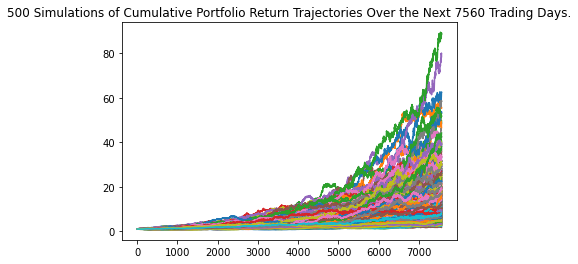

In [233]:
# Plot simulation outcomes
MC_shares.plot_simulation()

<AxesSubplot:title={'center':'Distribution of Final Cumuluative Returns Across All 500 Simulations'}, ylabel='Frequency'>

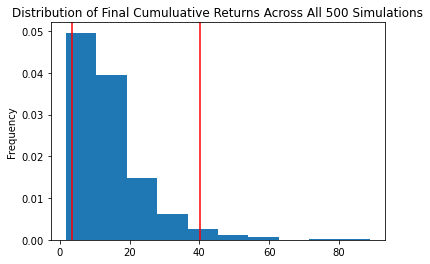

In [234]:
# Plot probability distribution and confidence intervals
MC_shares.plot_distribution()

In [235]:
# Fetch summary statistics from the Monte Carlo simulation results
shares_tbl = MC_shares.summarize_cumulative_return()

In [236]:
# Print summary statistics
print(shares_tbl)

count           500.000000
mean             14.541580
std              10.592338
min               1.751894
25%               7.573736
50%              11.779119
75%              17.755757
max              88.875343
95% CI Lower      3.411999
95% CI Upper     40.058577
Name: 7560, dtype: float64


In [237]:
#Calculate the expected portfolio return at the 95% lower and upper confidence intervals based on a $20,000 initial investment.

In [238]:
# Set initial investment
initial_investment = 20000

In [239]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(shares_tbl[8]*20000,2)
ci_upper = round(shares_tbl[9]*20000,2)

In [240]:
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $68239.99 and $801171.53


In [241]:
#Calculate the expected portfolio return at the 95% lower and upper confidence intervals based on a 50% increase in the initial investment.

In [242]:
initial_investment2 = initial_investment * 1.5
initial_investment2

30000.0

In [243]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower2 = round(shares_tbl[8]*30000,2)
ci_upper2 = round(shares_tbl[9]*30000,2)

In [244]:
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment2} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower2} and ${ci_upper2}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $102359.98 and $1201757.3
